## Loading the dataset

In [35]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True)
df = df.frame
# df = pd.DataFrame(df)

In [25]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Checking for missing values

In [12]:
def calc_missing_values(df):
  counts = (df
            .isnull()
            .sum())
  percentage = (counts
                .divide(df.shape[0]) # df.shape[1] is number of columns this is rows
                .multiply(100)
                )
  missing = pd.concat([counts, percentage], axis = 1)
  missing.columns = ["Num.", "% of missing"]
  return missing
calc_missing_values(df)

,Num.,% of missing
MedInc,0,0.0
HouseAge,0,0.0
AveRooms,0,0.0
AveBedrms,0,0.0
Population,0,0.0
AveOccup,0,0.0
Latitude,0,0.0
Longitude,0,0.0


We can see that there are no missing values

## Visualizations

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

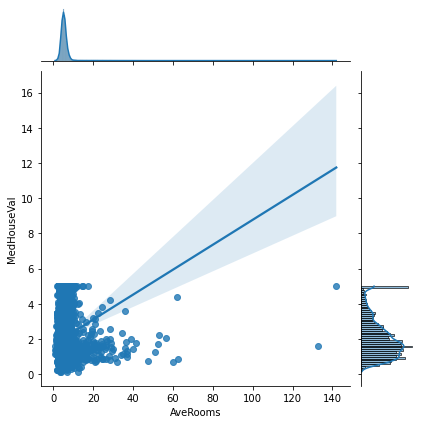

In [34]:
sns.jointplot(x = "AveRooms", y = "MedHouseVal", data = df, kind = "reg")

<AxesSubplot:>

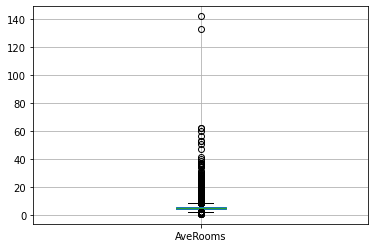

In [19]:
df.boxplot(column='AveRooms')

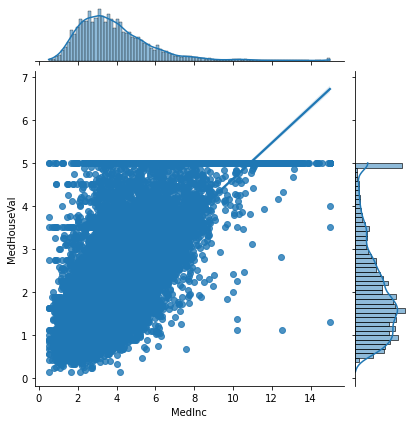

In [26]:
sns.jointplot(x = "MedInc", y = "MedHouseVal", data = df, kind = "reg")

<AxesSubplot:>

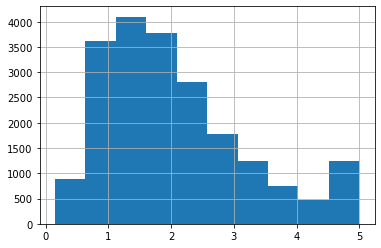

In [32]:
df['MedHouseVal'].hist()

<AxesSubplot:>

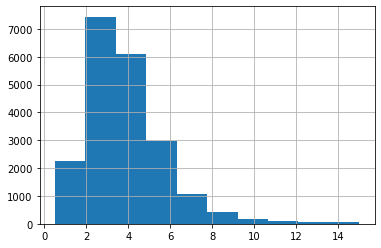

In [33]:
df['MedInc'].hist()

## Splitting the dataset

In [27]:
from sklearn.model_selection import train_test_split
x = df.drop('MedHouseVal', axis = 1) # shoud be the y target here
y = df['MedHouseVal']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Training the models

### Linear regression model

In [68]:
# we need to train a sklearn linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
linear_coefficients = model.coef_
print(f"The mean squared error is: {model.score(x_test, y_test)}")
print("Intercept: ", model.intercept_)

The mean squared error is: 0.575787706032451
Intercept:  -37.02327770606402


### Using Ridge regression

In [65]:
# we need to train a RidgeCV model
from sklearn.linear_model import RidgeCV
# we want to see the best coefficient for alpha using RidgeCV
ridge_model = RidgeCV(alphas=[0.1, 0.5, 0.001, 1,1.5, 1.25, 2, 3, 3.5, 5, 10, 12, 13,  15,  20,  0.05,0.01, 0.02, 0.07 ])
ridge_model.fit(x_train, y_train)
print("The mean squared error is: ", ridge_model.score(x_test, y_test))
print("Intercept: ", ridge_model.intercept_)
# we want to see the best coefficient for alpha using RidgeCV
ridge_coefficients = ridge_model.coef_
print("Best alpha for ridge regression: ", ridge_model.alpha_)

The mean squared error is:  0.5764371556176171
Intercept:  -36.98384375546472
Best alpha for ridge regression:  10.0


### Using Lasso regression

In [66]:
# we need to train a LassoCV model
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(alphas=[0.1, 0.5, 0.001,0.0001,0.0005, 0.0004, 2, 3, 3.5, 5, 10, 12, 13,  15,  20,  0.05,0.01, 0.02, 0.07 ])
lasso_model.fit(x_train, y_train)
print("The mean squared error is: ", lasso_model.score(x_test, y_test))
print("Intercept: ", lasso_model.intercept_)
lasso_coefficients = lasso_model.coef_
print("Best alpha for lasso regression: ", lasso_model.alpha_)

The mean squared error is:  0.5764148183552558
Intercept:  -36.94414906917633
Best alpha for lasso regression:  0.0004


### comparison

In [67]:
coefficient_df = pd.DataFrame([linear_coefficients, ridge_coefficients, lasso_coefficients], columns = x.columns, index = ['Linear', 'Ridge', 'Lasso'])
coefficient_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
Linear,0.448675,0.009724,-0.123323,0.783145,-0.000002,-0.003526,-0.419792,-0.433708
Ridge,0.447069,0.009741,-0.120293,0.766201,-0.000002,-0.003522,-0.419720,-0.433422
Lasso,0.447084,0.009748,-0.120289,0.766356,-0.000002,-0.003520,-0.419284,-0.432956
